# EMPLOYEE ATTRITION CONTROL

### CASE STUDY
The project is to help a company which is trying to control attrition. There are two sets of data: "Existing employees" and "Employees who have left". Following attributes are available for every employee;
-Satisfaction Level
-Last evaluation
-Number of projects
-Average monthly hours
-Time spent at the company
-Whether they have had a work accident
-Whether they have had a promotion in the last 5 years
-Departments (column sales)
-Salary

Use your analytics skills to answer the following questions :
1. What type of employees are leaving?
2. Which employees are prone to leave next.
3. Recommendations

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from skimpy import skim


C:\Users\MADONNA\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
sheet1=pd.read_excel('C:/Users/MADONNA/Desktop/CALLY/Utiva Data Science Prog/Class docs/Python/TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx', sheet_name='Existing employees')

sheet2=pd.read_excel('C:/Users/MADONNA/Desktop/CALLY/Utiva Data Science Prog/Class docs/Python/TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx', sheet_name='Employees who have left')

##Adding a column 'Attrition' with Value 'No' for Sheet2 showing those who are still employed in the company
sheetx=sheet1.assign(attrition='employed')

#Adding a column 'Attrition' with Value 'Yes' for Sheet2 showing those who have resigned/retired from the company
sheety=sheet2.assign(attrition='resigned')
sheety = sheety.reset_index(drop=True) #to allow the dataframes concatenate correctly

#concatenating sheetx and Sheet y
emp_data=pd.concat([sheetx,sheety], axis=0)
emp_data=emp_data.reset_index()

## I will create an extra column on emp_data to convert values for promotion_last_5years 
#showing bolean data converted to categorical data so as to enable smooth analysis 
emp_data['promotion_last_5years']=emp_data['promotion_last_5years'].apply(lambda x:"yes" if x==1.0 else "no")
emp_data

,index,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition
0,0,2001.0,0.58,0.74,4.0,215.0,3.0,0.0,no,sales,low,employed
1,1,2002.0,0.82,0.67,2.0,202.0,3.0,0.0,no,sales,low,employed
2,2,2003.0,0.45,0.69,5.0,193.0,3.0,0.0,no,sales,low,employed
3,3,2004.0,0.78,0.82,5.0,247.0,3.0,0.0,no,sales,low,employed
4,4,2005.0,0.49,0.60,3.0,214.0,2.0,0.0,no,sales,low,employed
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,3566,14995.0,0.40,0.57,2.0,151.0,3.0,0.0,no,support,low,resigned
14995,3567,14996.0,0.37,0.48,2.0,160.0,3.0,0.0,no,support,low,resigned
14996,3568,14997.0,0.37,0.53,2.0,143.0,3.0,0.0,no,support,low,resigned
14997,3569,14998.0,0.11,0.96,6.0,280.0,4.0,0.0,no,support,low,resigned


In [6]:
## creating a band  for hours worked in the company to ease analysis
def f(row):
    if row['average_montly_hours']<50:
        val= '0 - 49'
    elif row['average_montly_hours'] < 100:
        val= '50 - 99'
    elif row['average_montly_hours'] < 150:
        val= '100 - 149'
    elif row['average_montly_hours'] < 200:
        val= '150 - 199'
    elif row['average_montly_hours'] < 250:
        val= '200 - 249'
    elif row['average_montly_hours'] < 300:
        val= '250 - 299'
    else: 
        val= '300 - 349'
    return val

emp_data['avg_montly_hrs_bands']= emp_data.apply(f, axis=1) ##appending the created bands column to emp_data
emp_data

,index,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition,avg_montly_hrs_bands
0,0,2001.0,0.58,0.74,4.0,215.0,3.0,0.0,no,sales,low,employed,200 - 249
1,1,2002.0,0.82,0.67,2.0,202.0,3.0,0.0,no,sales,low,employed,200 - 249
2,2,2003.0,0.45,0.69,5.0,193.0,3.0,0.0,no,sales,low,employed,150 - 199
3,3,2004.0,0.78,0.82,5.0,247.0,3.0,0.0,no,sales,low,employed,200 - 249
4,4,2005.0,0.49,0.60,3.0,214.0,2.0,0.0,no,sales,low,employed,200 - 249
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,3566,14995.0,0.40,0.57,2.0,151.0,3.0,0.0,no,support,low,resigned,150 - 199
14995,3567,14996.0,0.37,0.48,2.0,160.0,3.0,0.0,no,support,low,resigned,150 - 199
14996,3568,14997.0,0.37,0.53,2.0,143.0,3.0,0.0,no,support,low,resigned,100 - 149
14997,3569,14998.0,0.11,0.96,6.0,280.0,4.0,0.0,no,support,low,resigned,250 - 299


## DATA EXPLORATION

In [66]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 3570
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  attrition              14999 non-null  object 
dtypes: float64(8), object(3)
memory usage: 1.4+ MB


### Observation: 
There are 8 variables which are floats and 3 variables that are of string datatype.

In [8]:
skim(emp_data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 14999  │ │ float64     │ 8     │                                                          │
│ │ Number of columns │ 12     │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA  ┃ NA %   ┃ mean    ┃ sd     ┃ p0     ┃ p25    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ index                      │   0 │      0 │    4800 │   3400 │      0 │   1900 │   7700 │  11000 │ █▇▄▄▄▄  │  │
│ │ Emp ID                     │   0 │      0 │    7500 │   4300 │      1 │   3800 │  11000 │  15000 │ ██████  │  │
│ │ satisfaction_level         │   0 │      0 │    0.61 │   0.25 │   0.09 │   0.44 │   0.82 │      1 │ ▄▃▆▇█▇  │  │
│ │ last_evaluation            │   0 │      0 │    0.72 │   0.17 │   0.36 │   0.56 │   0.87 │      1 │ ▂█▅▆▇▇  │  │
│ │ number_project             │   0 │      0 │     3.8 │    1.2 │      2 │      3 │      5 │      7 │  ▄▇█▅▂  │  │
│ │ average_montly_hours       │   0 │      0 │     200 │     50 │     96 │    160 │    240 │    310 │ ▂█▅▆▇▂  │  │
│ │ time_spend_company         │   0 │      0 │     3.5 │    1.5 │      2 │      3 │      4 │     10 │  █▂▁▁   │  │
│ │ Work_accident              │   0 │      0 │    0.14 │   0.35 │      0 │      0 │      0 │      1 │ █    ▁  │  │
│ │ promotion_last_5year       │   0 │      0 │   0.021 │   0.14 │      0 │      0 │      0 │      1 │    █    │  │
│ └────────────────────────────┴─────┴────────┴─────────┴────────┴────────┴────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ dept                      │       0 │          0 │                            1 │                    15000 │  │
│ │ salary                    │       0 │          0 │                            1 │                    15000 │  │
│ │ attrition                 │       0 │          0 │                            1 │                    15000 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## Employee Distribution By Departments

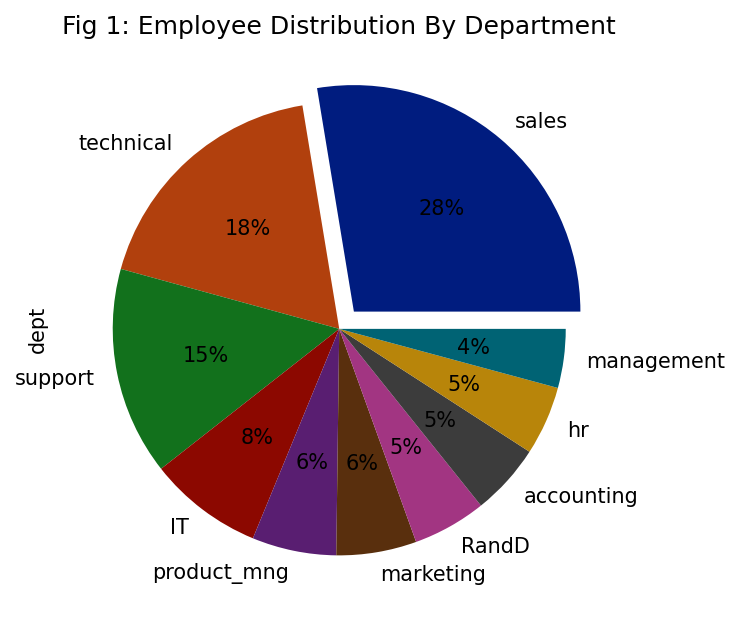

In [77]:
plt.figure(figsize=(7,5), dpi=150)
explode=[0.1,0,0,0,0,0,0,0,0,0]
emp_dis=(emp_data['dept'].value_counts()/emp_data['dept'].value_counts(normalize=True).sum()).plot.pie(autopct='%1.0f%%',
                        colors=palette_color,explode=explode)
plt.title('Fig 1: Employee Distribution By Department')
plt.show()

The company's sales section employs the most people (28%), followed by the technical and support divisions (18% and 15%, respectively). At 4%, management has the fewest people overall, which is typical in today's industry.

## Employee Attrition Rate
      


In [136]:
#To Find the percentage(Attrition Rate) of those who are still actively employed in the company and resigned/retired

Att_rate=round(((emp_data['attrition']=='resigned').value_counts())/len(emp_data['attrition'])*100.0)
Att_rate

False    76.0
True     24.0
Name: attrition, dtype: float64

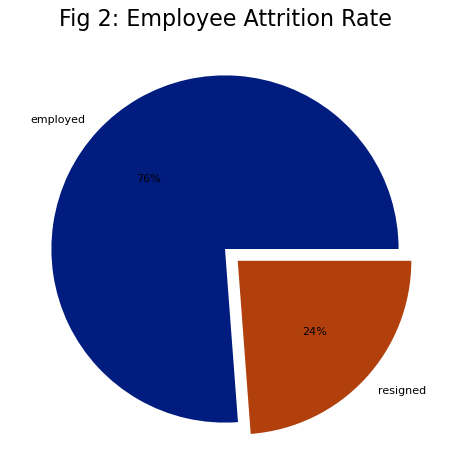

In [45]:
fig, ax = plt.subplots(figsize=(7,15),dpi=80)
explode = [0, 0.1]
palette_color = sns.color_palette('dark')
ax.set_title('Fig 2: Employee Attrition Rate', fontsize=20, fontname="Dejavu Sans")
ax = emp_data['attrition'].value_counts(normalize=True).plot.pie(autopct='%1.0f%%', colors=palette_color, explode=explode)
ax.set_ylabel("")
plt.show()

The aforementioned graph (fig 2) demonstrates that this company's attrition rate is 24%. This is higher than the expected levels for the general industry in the USA in 2022, which are 20%. (https://www.gartner.com/en/newsroom/04-28-2022-gartner-says-us-total-annual-employee-turnover-will-likely-jump-by-nearly-twenty-percent-from-the-prepandemic-annual-average#:~:text=U.S.%20employee%20annual%20voluntary%20turnover,%2C%20according%20to%20Gartner%2C%20Inc).

The organization can be stated to have a moderate attrition rate if cross-matched to industry norms provided in 2021 (https://www.award.co/blog/employee-turnover-rates).

## What Type of Employees are Leaving the Company:

After assessing the distribution of workers across the organization and the general level of attrition, we begin looking into the types of employees who are leaving the company. Based on the collected data, we will look into the following to find out more about possible reasons for employee retirement or resignation.

Thus, we will attempt to solve the problems by looking into the followiing factors;

1. Each department's attrition rate in relation to other factors

2. Comparing the attrition rate by salary level to other factors

3. Job satisfaction levels and attrition rates in connection to other factors

4. Rate of attrition by the  length of time spent working for the organization in comparison to other factors

5. Promotional attrition and last evaluation

6. Ratio of staff attrition to the number of projects completed

##   Attrition Rate By Department

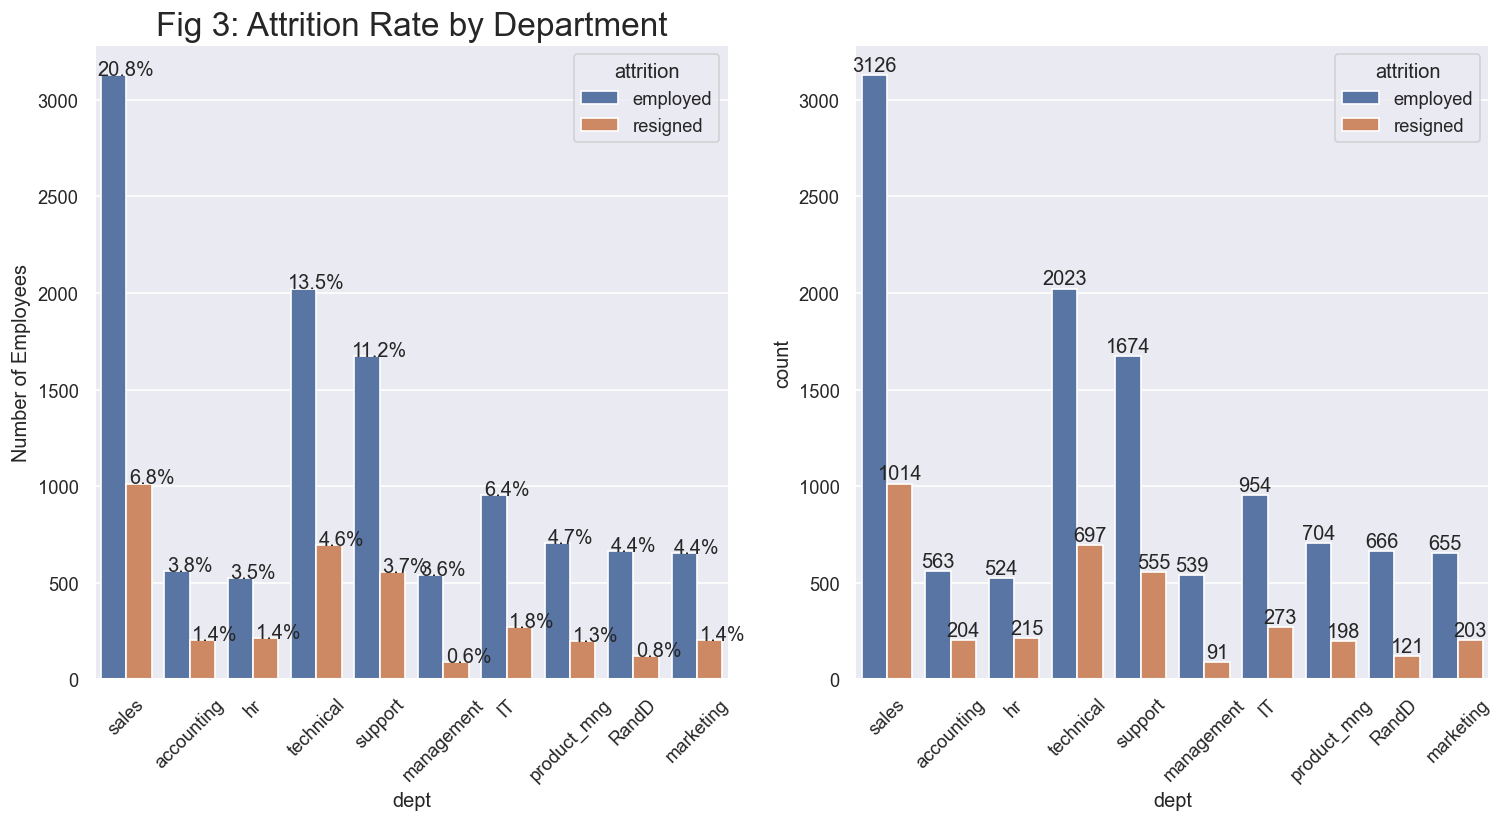

In [46]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,7),dpi=120)
plt.subplot(1,2,1)
total = float(len(emp_data))
ax = sns.countplot(x='dept', hue='attrition', data=emp_data)
plt.title('Fig 3: Attrition Rate by Department', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
ax=sns.countplot(x='dept', hue='attrition', data=emp_data
               )
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.show()


The sales department, with 1014 people (6.8% of the company's workforce and 24% of the sales Department), has the highest attrition rate in terms of numbers, as shown by the graph (fig. 3). The Technical Department, which made up 697 resignations (4.6% of the company's personnel and 24% of the department), and the Support Department, which made up 555 resignations (3.7% of the company's workforce and 25% of the department. In terms of percentage, 29% of the HR department's workers (215 persons, or 1.4% of the total workforce) have either retired or left the organization.
The R & D department and management had the lowest attrition rates, with 121 (0.8% at the company level and 15% at the departmental level) and 91 (0.6% at the company level and 14% at the Departmental level), respectively, of their respective departments.


 ## Attrition Level of Employees per Department who reported  being satisfied with their job

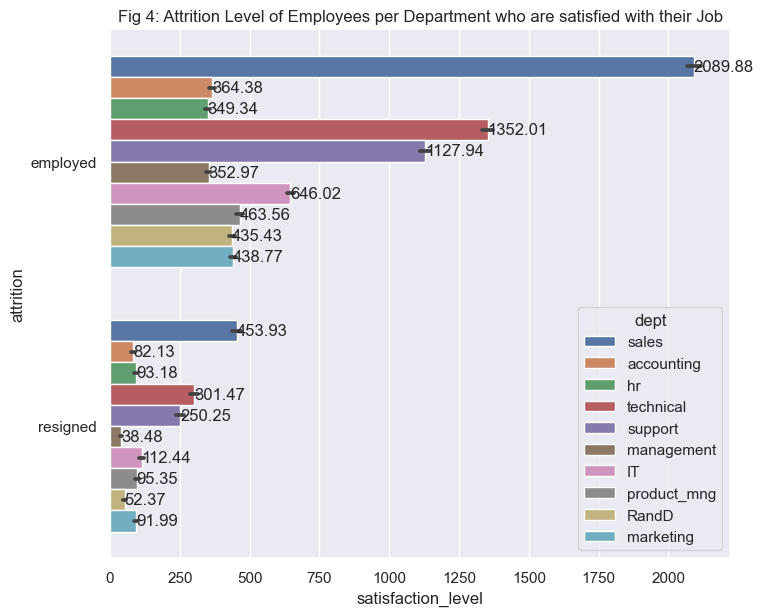

In [47]:
plt.figure(figsize=(8,7),dpi=100)
ax=sns.barplot(x='satisfaction_level',y='attrition', hue='dept', data=emp_data,estimator=np.sum
               )
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Fig 4: Attrition Level of Employees per Department who are satisfied with their Job')

plt.show()

**Figure 4:** The graph demonstrates that the sales department has a greater percentage of workers (more than 2000 employees) who are happy with their jobs and continue to work for the company. These are primarily entry-level employees out of the job market working for experience or recent hires who depend on the employment to support themselves.

A comparison of employee salaries and levels of satisfaction reveals that a higher percentile of low-paid workers who stayed with the company had satisfaction levels of 0.50 and above (Fig 5).

High percentages of personnel in the technical department and the support department expressed satisfaction with their work and remained with the company.

Despite being largely content with their careers, people who retired or resigned from their positions typically worked in the sales, technical, and support departments.

When compared to other departments, the attrition rate among management employees who are happy with their jobs was the lowest.

## Salary Distribution of the Company

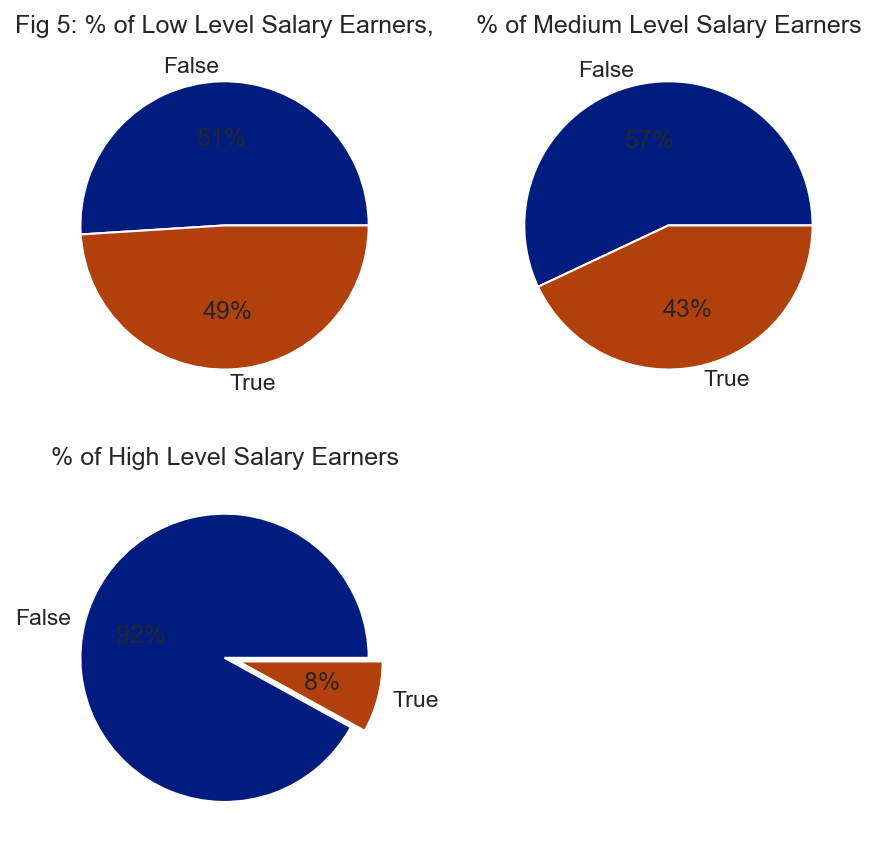

In [67]:
fig, ax = plt.subplots(figsize=(7,7),dpi=150)
palette_color = sns.color_palette('dark')
plt.subplot(2,2,1)
ma1=emp_data['satisfaction_level']
explode=[0.0,0.0]
round(((emp_data['salary']=='low').value_counts('ma1'))*100).plot.pie(autopct='%1.0f%%', explode=explode,
                                                                      colors=palette_color)
plt.title('Fig 5: % of Low Level Salary Earners,')
plt.ylabel('')

plt.subplot(2,2,2)
ma1=emp_data['satisfaction_level']
explode=[0.0,0.0]
round(((emp_data['salary']=='medium').value_counts('ma1'))*100).plot.pie(autopct='%1.0f%%', explode=explode,
                                                                         colors=palette_color)
plt.title('% of Medium Level Salary Earners')
plt.ylabel('')

plt.subplot(2,2,3)
ma1=emp_data['satisfaction_level']
explode=[0.0,0.1]
round(((emp_data['salary']=='high').value_counts('ma1'))*100).plot.pie(autopct='%1.0f%%', explode=explode,
                                                                      colors=palette_color)
plt.title('% of High Level Salary Earners')
plt.ylabel('')
plt.show()

Figure 5 illustrates the extreme inequality in the company's wage levels. Only 8% of the company's workforce,  a minority, earns a high pay, compared to 43% and 49%, respectively, for medium and low salaries.

This is not a hopeful image, as it might grow the income gap between those in the lower and middle classes and those who earn higher salaries, which would decrease employee happiness. 


## Attrition Rate by Salary Levels

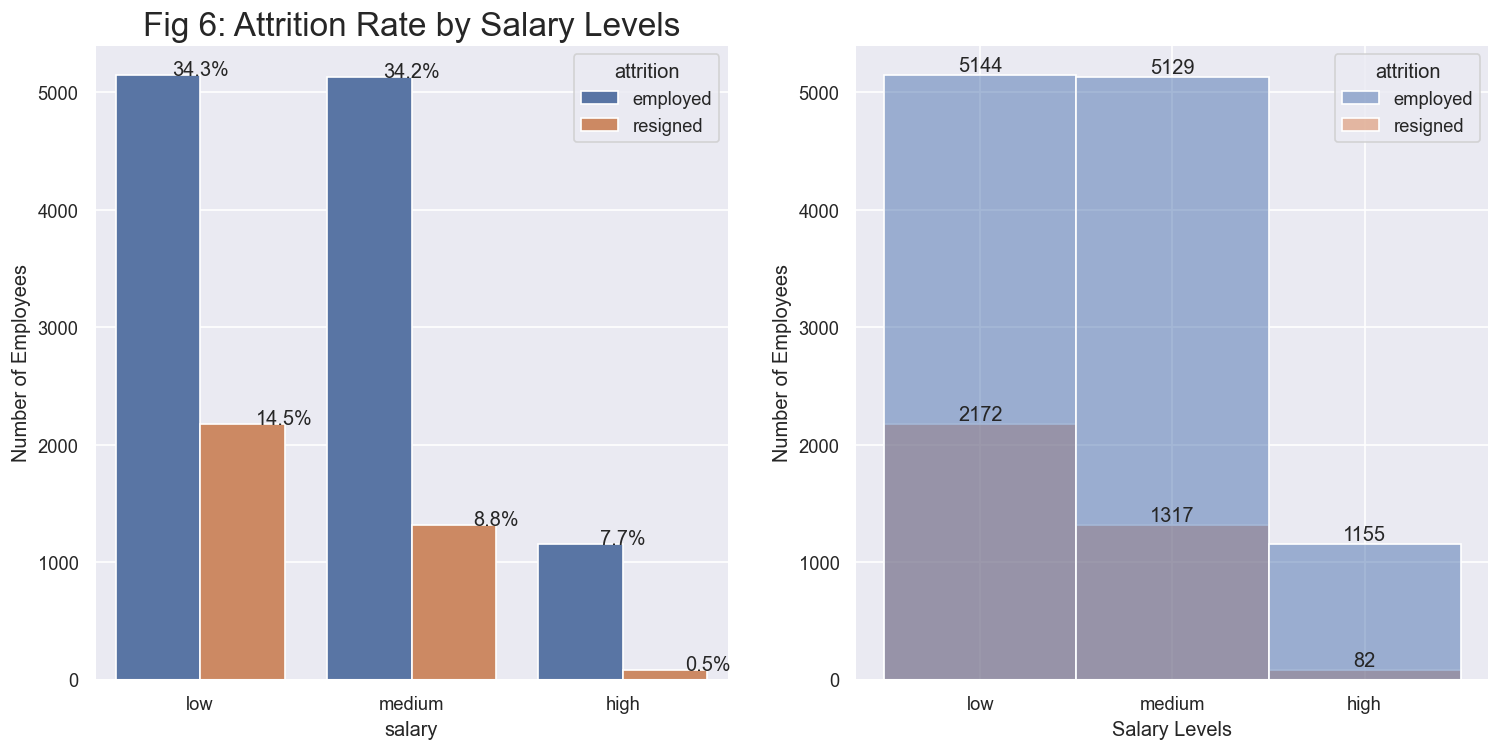

In [48]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,7),dpi=120)
plt.subplot(1,2,1)
total = float(len(emp_data))
ax = sns.countplot(x='salary', hue='attrition', data=emp_data)
plt.title('Fig 6: Attrition Rate by Salary Levels', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.ylabel('Number of Employees')

plt.subplot(1,2,2)
ax=sns.histplot(x='salary',data= emp_data,hue='attrition', bins=20,
            binwidth=0.03,
            kde=False, 
            )
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel('Number of Employees')
plt.xlabel('Salary Levels')

plt.show()



The rate of attrition as a result of the company's compensation levels is shown in Fig 6 above. In this graph, lower-paid employees account for a higher percentage of attrition (14.5%; 2172) of the company's overall workforce that has either retired or quit. The average attrition rate for employees earning medium-level salaries is 8.8% (1317), while the lowest attrition rate is by employees earning higher salaries  0.5% (82 individuals).

This suggests that 8.2% of the 14,999 employees are high salary earners, while 91.8% of the company's workforce are medium and low level salary earners. The company's wealth distribution is negatively tilted away from low and middle income earners.

As shown in Fig 7, the number of employees who resigned and have a low or medium salary level is relatively higher than those who earn a high salary. 

## Job Satisfaction level in light of the employees salary levels

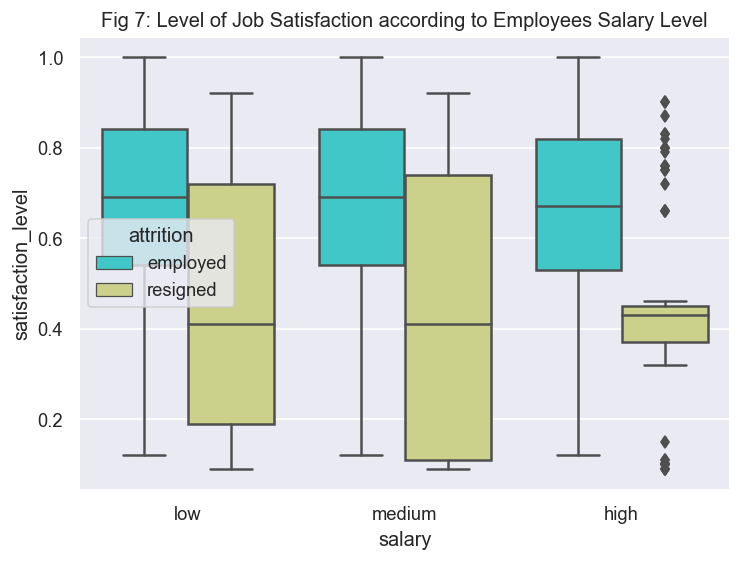

In [49]:
plt.figure(figsize=(7,5),dpi=120)
sns.boxplot(x='salary', y='satisfaction_level', data=emp_data, hue='attrition', palette='rainbow')
plt.title('Fig 7: Level of Job Satisfaction according to Employees Salary Level')
plt.show()

In Fig 7 above, we try to understand the motive behind attrition by checking the levels of satisafaction of the employees to their salary level in the company.

From the chart, we see that those who are on the lower salary scale that have left the company majorly had low satisfaction level. The boxplot bar for the resigned employees shows that the 50th percentile of the employees that resigned had 0.4 satisfaction level. while from the 50th percentile to the 75th percentile had satisfaction levels of 0.4 - 0.7. if we compare this to the box plot of those who are still employed where the 25th percentile of the employee population had 0.55 level of satisfaction, we see the wide difference in satisfaction levels because 25th percentile of the current employees satisfaction level still exceeds the 50th percentile mark of those who have resigned. 

The same could be said for employees who are still employed and for those who have resigned from the company and have a medium salary level. Although the range and population of those on this medium salary scale who have resigned is a bit wider, having more employees who have lower satisfaction than those on low salary scale, we still see that their 50th percentile mark is the same as shown in the chart. We also see that the range of job satisfaction for those who are still employed by the company starts at 0.55 at the 25th percentile mark to 0.85 and 1.00 for the 75th and 100th percentile showing that they are more satisfied with the job compared to those who have resigned.

As for those on the higher salary scale which data above showed that they form only 8% of the company's workforce, we still see thst those who had a relatively lower satisfaction level are those who have resigned. Although there are outliers who had higher satisfaction level but for other cogent reasons as discovered above, these in dividuals have also resigned.

it is also important to understand that there are those who are still employed in the company, on the different  salary levels who are still very unsatisfied with their jobs. these employee pose a threat to the increasing turnover rate in the company as given by our data above.

**IMPLICATION:**
Lower satisfaction on the job will most likely lead to employee attrition. Salary levels also have an impact on the employee satisfaction in the company and could also lead to a higher attrition rate if majority of the employees are not well paid.


## Employee Salary Level by years Worked and the Rate of Attrition

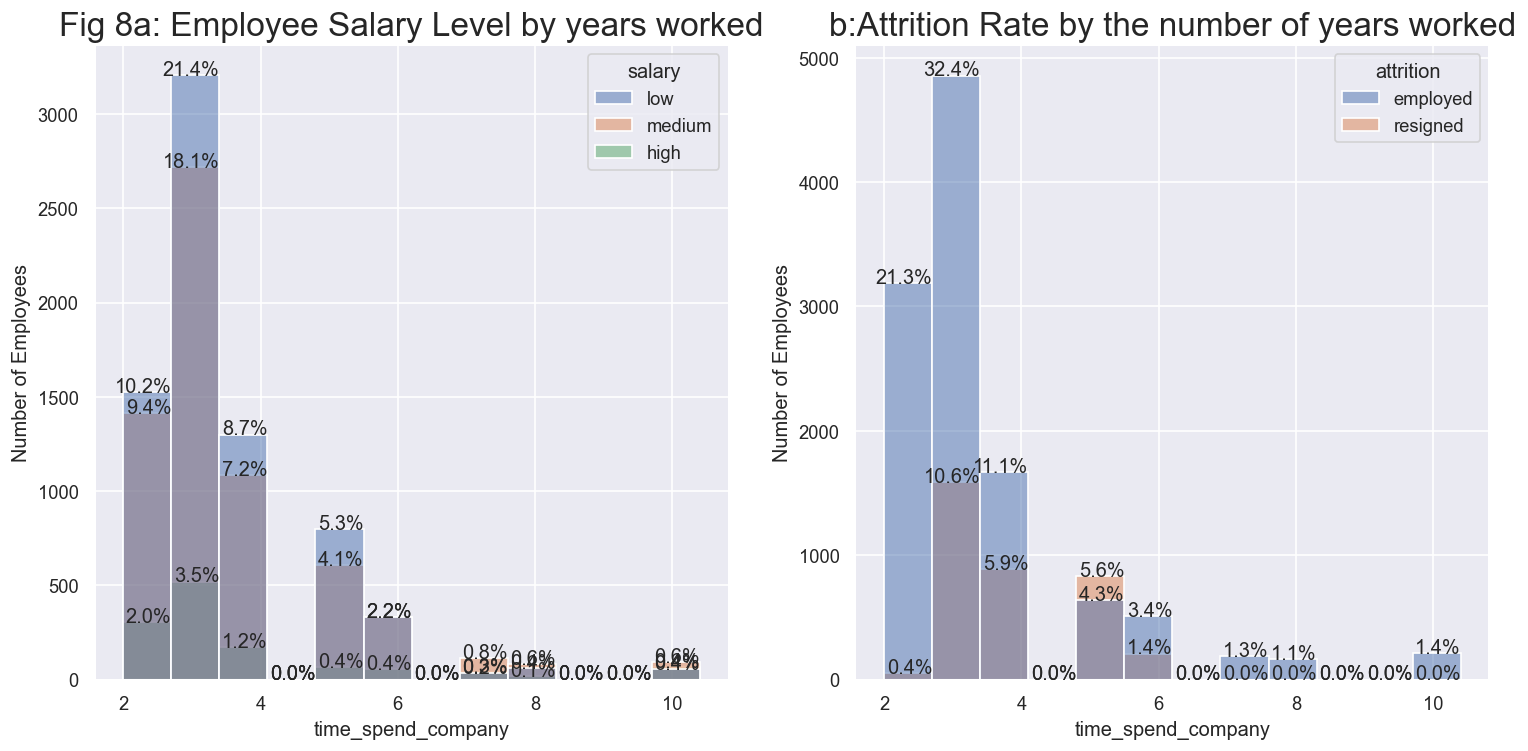

In [50]:
plt.figure(figsize=(15,7),dpi=120)
sns.set(style='darkgrid')
total = float(len(emp_data))
plt.subplot(1,2,1)
ax =sns.histplot(x='time_spend_company',
        data= emp_data, hue='salary', bins=15,
        binwidth=0.7, kde=False)
plt.title('Fig 8a: Employee Salary Level by years worked', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.ylabel('Number of Employees')

plt.subplot(1,2,2)
ax =sns.histplot(x='time_spend_company',
        data= emp_data, hue='attrition', bins=15,
        binwidth=0.7, kde=False)
plt.title('b:Attrition Rate by the number of years worked', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.ylabel('Number of Employees')

plt.show()

The distribution of employees by years of employment and by firm compensation levels is shown in Fig. 8a above. A significant portion of the company's overall workforce—21.4% of whom had worked there for 3 years, 10.2% of whom are relatively new hires—was paid on a lower compensation scale and had worked there for 2 to 5 years or less. After 4 and 5 years in the company, respectively, 8.7% and 5.3% of employees are still earning a meager wage.

Similar to this, 18.1% of the whole workforce made a medium salary and had worked for the company for 3 years, while 9.4% had been there for two years, 7.2% for four, and 4.1% for five. The remaining 4% of staff members have worked there for between 6 and 10 years and are paid on the company's medium salary range.

7.1% of the workforce getting a high pay has worked there for between 2 to 5 years, while 1.2% of the workforce earning a high salary has worked there for between 6 to 10 years.

The least rate of quitters is seen among employees who have only worked for the company for between one and two years, according to Fig. 8b, which displays the attrition rate according to the number of years spent there. Employees who have worked for the company for three years have the greatest attrition rates (10.6%), followed by those who have worked there for 4 years (5.9%), 5 years (5.6%), and 6 years (1.4%).

Those who have worked for the company for more than six years and are all, obviously, paid on the medium to high pay scale did not resign, retire, or leave the organization.

IMPLICATION:
Most employees who have remained with the company for up to three years and have not seen an increase in pay are likely to quit. As evidenced by the data above, employees who have gone more than three years without a salary increase from medium pay scale to high pay scale or from low  pay scale to medium pay scale also tend to resign.

## Level of Job satisfaction as it affects the Attriton rate

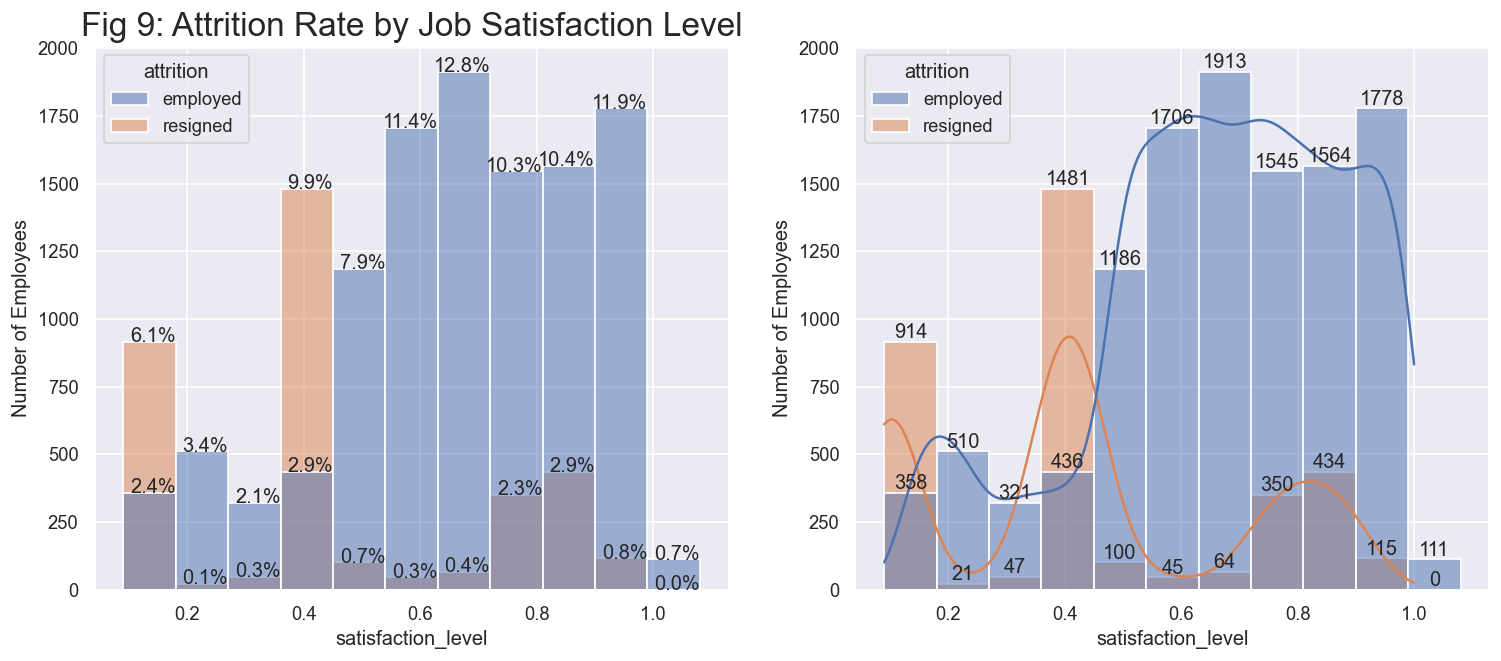

In [51]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,6),dpi=120)
plt.subplot(1,2,1)
total = float(len(emp_data))
ax = sns.histplot(x='satisfaction_level', hue='attrition', data=emp_data, bins=20,binwidth=0.09)
plt.title('Fig 9: Attrition Rate by Job Satisfaction Level', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.ylabel('Number of Employees')

plt.subplot(1,2,2)
ax=sns.histplot(x='satisfaction_level',data= emp_data, hue='attrition', bins=20,
            binwidth=0.09,
            kde=True)
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel('Number of Employees')
plt.show()

A distribution of the company's employees, demonstrating their levels of satisfaction, as shown in Fig. 9 above. According to the graph, a higher percentage of people who are still working indicated medium to high job satisfaction levels above 0.4, whereas attrition rates were higher for people who reported poor job satisfaction levels (0.4 and below).

Although the distribution is lower than that of individuals who reported lower satisfaction levels, the data indicates that some of those who reported a greater degree of satisfaction also departed the organization. It is therefore reasonable to presume that these individuals quit for reasons other than a lack of job satisfaction.

IMPLICATION:

When work satisfaction is low, attrition is more likely to occur.

## Level Of Satisfaction in relation to hours worked in the company

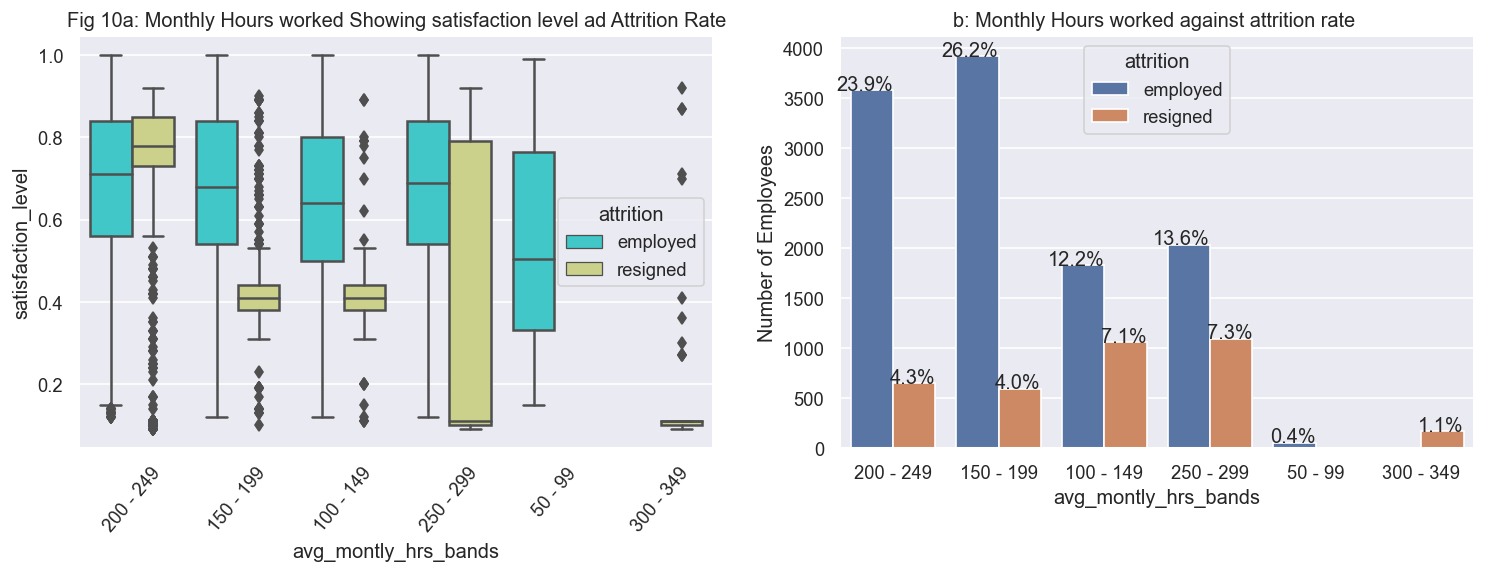

In [55]:
## Plotting the new column against satisfaction level
plt.figure(figsize=(15,10),dpi=120)
plt.subplot(2,2,1)
sns.boxplot(x='avg_montly_hrs_bands', y='satisfaction_level', data=emp_data,  hue='attrition',palette='rainbow')
plt.title('Fig 10a: Monthly Hours worked Showing satisfaction level ad Attrition Rate')
plt.xticks(rotation=50)

plt.subplot(2,2,2)
total = float(len(emp_data))
ax = sns.countplot(
        x='avg_montly_hrs_bands',
        data= emp_data, hue='attrition')
plt.title('b: Monthly Hours worked against attrition rate ')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.ylabel('Number of Employees')
plt.show()

To better understand the causes of the attrition rate in the organization, the hours worked are plotted against employee satisfaction levels in the boxplot graph shown above (Fig). 
We can infer from the visualization above that the majority of employees who have left the organization worked more than 250–299 hours each month. Their degree of satisfaction is evenly distributed throughout all levels, with the 50th percentile falling below the 0.2 mark. Even at their maximum happiness score of 0.8, this band has parted ways with the company. This demonstrates how overworked these workers felt.

Except for a few outliers as seen in the figure above, everyone who worked more than 300 hours per month is completely dissatisfied with their work in the organization. Additionally, it is clear from the table above that everyone in this band has left the organization.

Less attrition was observed among employees who worked fewer than 250 hours per month compared to those who worked more. Those who put in between 200 and 249 hours per week shown a high degree of general job satisfaction, but some nevertheless left the organization.

IMPLICATION:

Employee satisfaction will undoubtedly decline if longer work hours are required of them, particularly if they are not accompanied by a pay raise or  compensation for any overtime put in by the employees.

## Distribution of hours worked and their salary levels and the Average Distribution of Years Spent in the company

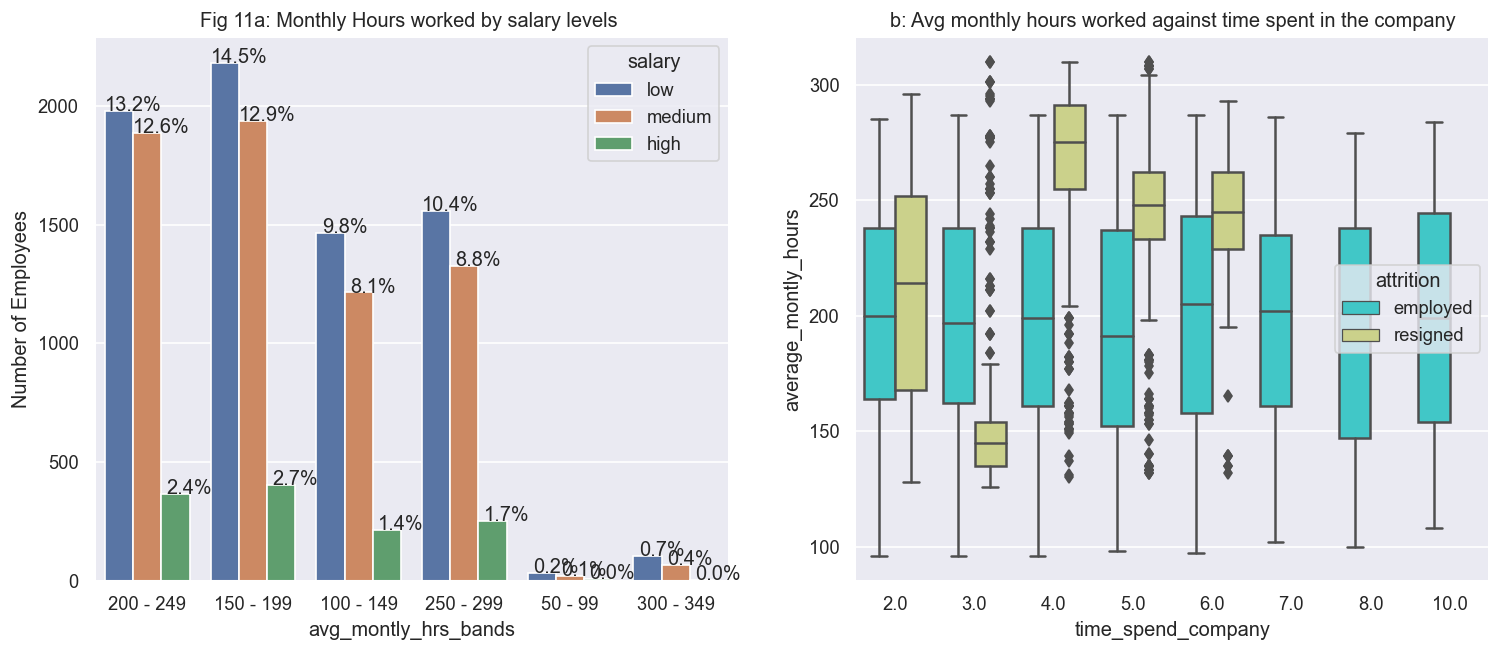

In [56]:
plt.figure(figsize=(15,6),dpi=120)
plt.subplot(1,2,1)
total = float(len(emp_data))
ax = sns.countplot(
        x='avg_montly_hrs_bands',
        data= emp_data, hue='salary',)
plt.title('Fig 11a: Monthly Hours worked by salary levels ')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.ylabel('Number of Employees')

plt.subplot(1,2,2)
sns.boxplot(x='time_spend_company', y='average_montly_hours', data=emp_data, hue='attrition', palette='rainbow')
plt.title('b: Avg monthly hours worked against time spent in the company')
plt.show()

The reasons why employee attrition rate is impacted by hours worked given the level of compensation received are further explained in Fig 11a above.
10.4% of workers who put in 250 or more hours per month or more are still on the low pay scale, while 8.8% and 1.7% are paid at the medium and high levels. These workers put in more hours at the office, but their pay is still less than that of workers who clock in fewer hours each month.
The employees who work between 150-199 hours per month has a higher population of low, medium and high salary levels compared to others who put in more work hours per month.

In Fig. 11b, we can see that individuals who have worked more than 250 man hours per month and stayed with the company for up to 4 years had the greatest attrition rates. Despite the fact that year three's data reveals a reduced attrition distribution, there are still outliers that show employees working in excess of 200 hours per month. Those who are still employed in the company put in an average of 180–210 hours per month at their jobs.

Depending on the sector or industry, a usual work week is between 32 hours and 44 hours. According to this, the average work month for a country with a high level of industrialization, like the United States, is between 128 and 176 hours. https://clockify.me/working-hours#:~:text=Working%20hours%20in%20US,those%20working%20in%20the%20US

IMPLICATION:

1. Work hours over 180 hours per month should be regarded as excessive, and the graph above shows that this company's average distribution of work hours is significantly higher than the industry average and should be examined.

2. Employees who clock in at least 200 hours per month tend to be dissatisfied with the compensation levels distribution because despite putting in more hours, they are paid on par with or less compared to those who have not worked as much. Therefore, an overtime compensation package should be considered.

## Promotion in the Last 5 Years

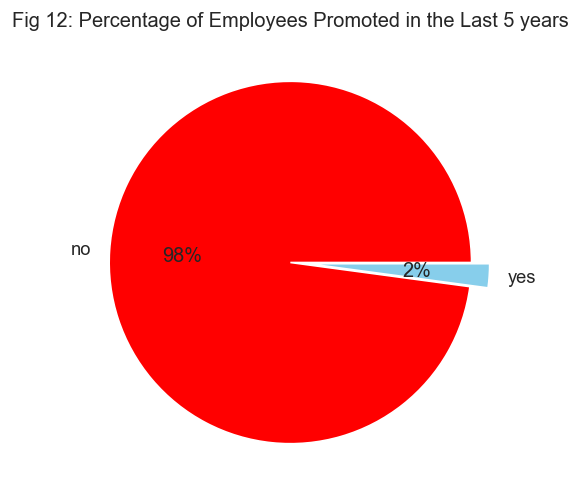

In [29]:
sns.set(style="darkgrid")
colors = [ 'red', 'skyblue']
fig, ax = plt.subplots(figsize=(6,5),dpi=120)
explode=[0,0.1]
(round((((emp_data['promotion_last_5years']).value_counts([1.0]))*100),2)).plot.pie(autopct='%1.0f%%',
                    colors=colors, explode=explode, shadow=False)
plt.ylabel("")
plt.title('Fig 12: Percentage of Employees Promoted in the Last 5 years')


plt.show()

The data above as provided by the company shows that onlt 2% of the company's employees have been promoted in the lat 5 years.

This is a poor practice and is not in the best interest of the company as employees will view the company as a place where they cannot easily verify their growth rate. Any time between working for four to five years and without getting promoted will risk damaging the future career prospects of employees. The average time for one to be promoted is also about every three years and that's how often one should expect to get a promotion

## Attrition Rate  Distribution as a result of 5 years Promotions Practice

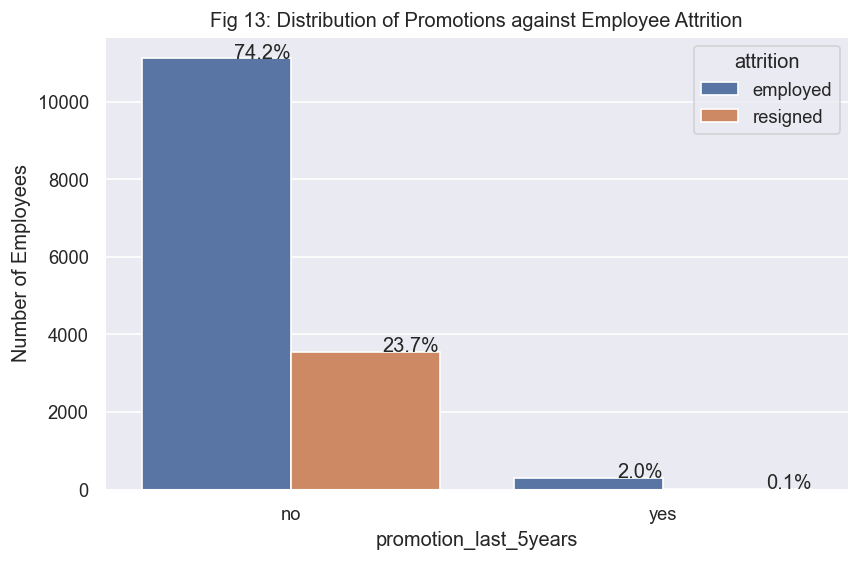

In [58]:
plt.figure(figsize=(8,5),dpi=120)
total = float(len(emp_data))
ax = sns.countplot(
        x='promotion_last_5years',
        data= emp_data, hue='attrition', orient='h'
)
plt.title('Fig 13: Distribution of Promotions against Employee Attrition')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.ylabel('Number of Employees')
plt.show()

According to the above graph (Fig. 13), 23.7% of the company's workforce who have left or retired have not received promotions in the previous five years, as opposed to 0.1% of those who left or retired despite receiving a promotion in the previous five years. 
2% of the company's employees were promoted in the previous five years and the remaining 74.2 percent of its workforce who sre still employed in the company were not promoted in the last 5 years.

IMPLICATION:

Employees will loose interest in the job and promote themselves by seeking better opportunities elsewhere if promotion practice remains unchanged.

## Employee Salary Levels against Promotion within the last 5 years

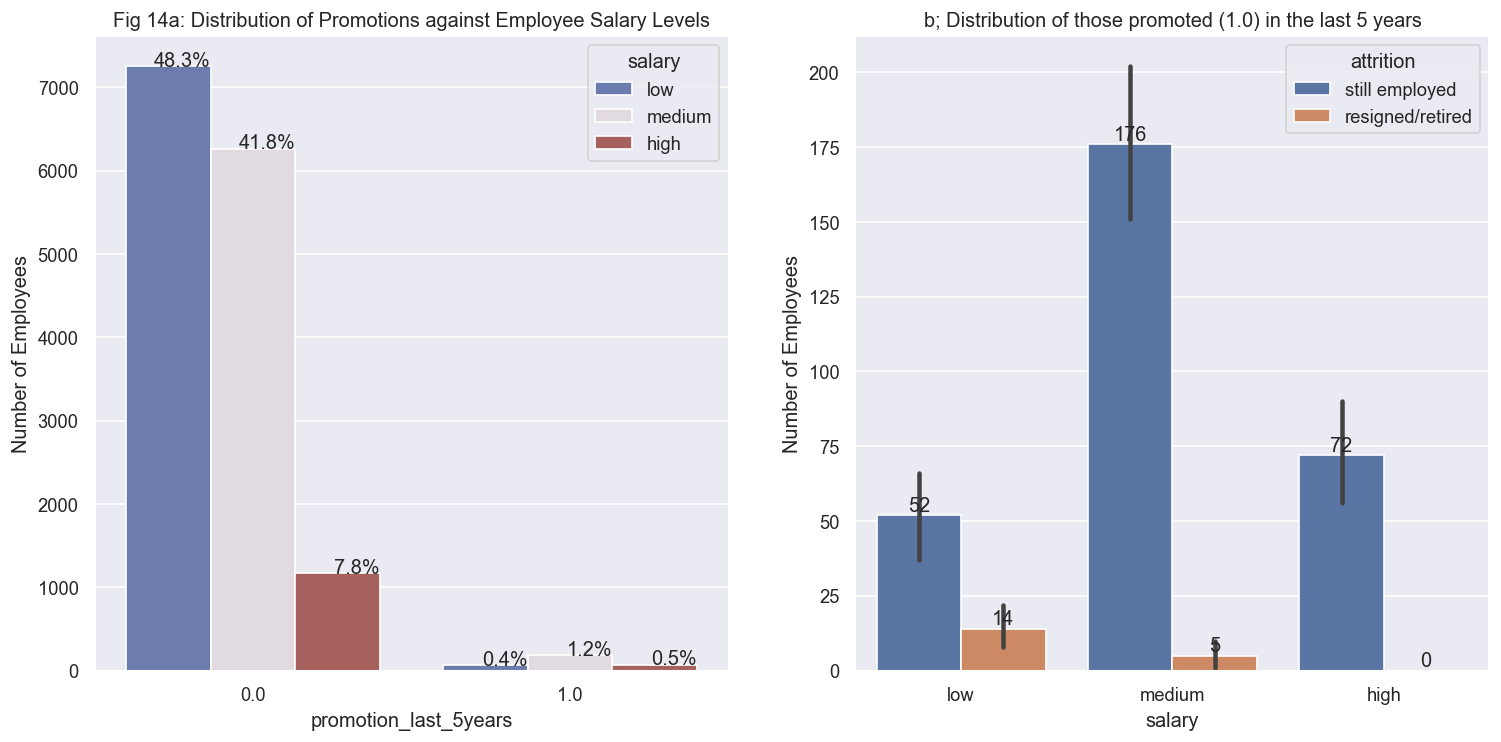

In [139]:
plt.figure(figsize=(15,7),dpi=120)
plt.subplot(1,2,1)
total = float(len(emp_data))
ax = sns.countplot(x='promotion_last_5years',data= emp_data, hue='salary', palette='twilight_shifted')
plt.title('Fig 14a: Distribution of Promotions against Employee Salary Levels')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.ylabel('Number of Employees')

plt.subplot(1,2,2)
ax=sns.barplot(y='promotion_last_5years', x='salary',data=emp_data,hue='attrition', estimator=np.sum)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('b; Distribution of those promoted (1.0) in the last 5 years')
plt.ylabel('Number of Employees')

plt.show()

The graph above shows the employee salary ranges over the preceding five years (Fig. 14a). 

48.3% of those who were passed over for promotion receive low pay, compared to 41.8% who receive medium pay and 7.8% who receive high pay. While 1.2% and 0.5% of the 2.1% of employees who gained promotions in the past five years received medium or high incomes, 0.4% of the 2.1% had low pay.

This is not a good result because it will further lower employee morale across the board. 

The attrition rate and salaries of people who got promotions are shown in Figure 14b. 5.9% of this group departed or resigned for reasons best known to them, compared to 94.1% who remained employed by the company.

IMPLICATION:

If an employee feels that their current employer does not recognize their input in the organization, they are more likely to leave their position in quest of better opportunities. High staff turnover is almost certainly going to be the result of a bad compensation and promotion scheme.

## Correlation between Promotion and Last Evaluation.

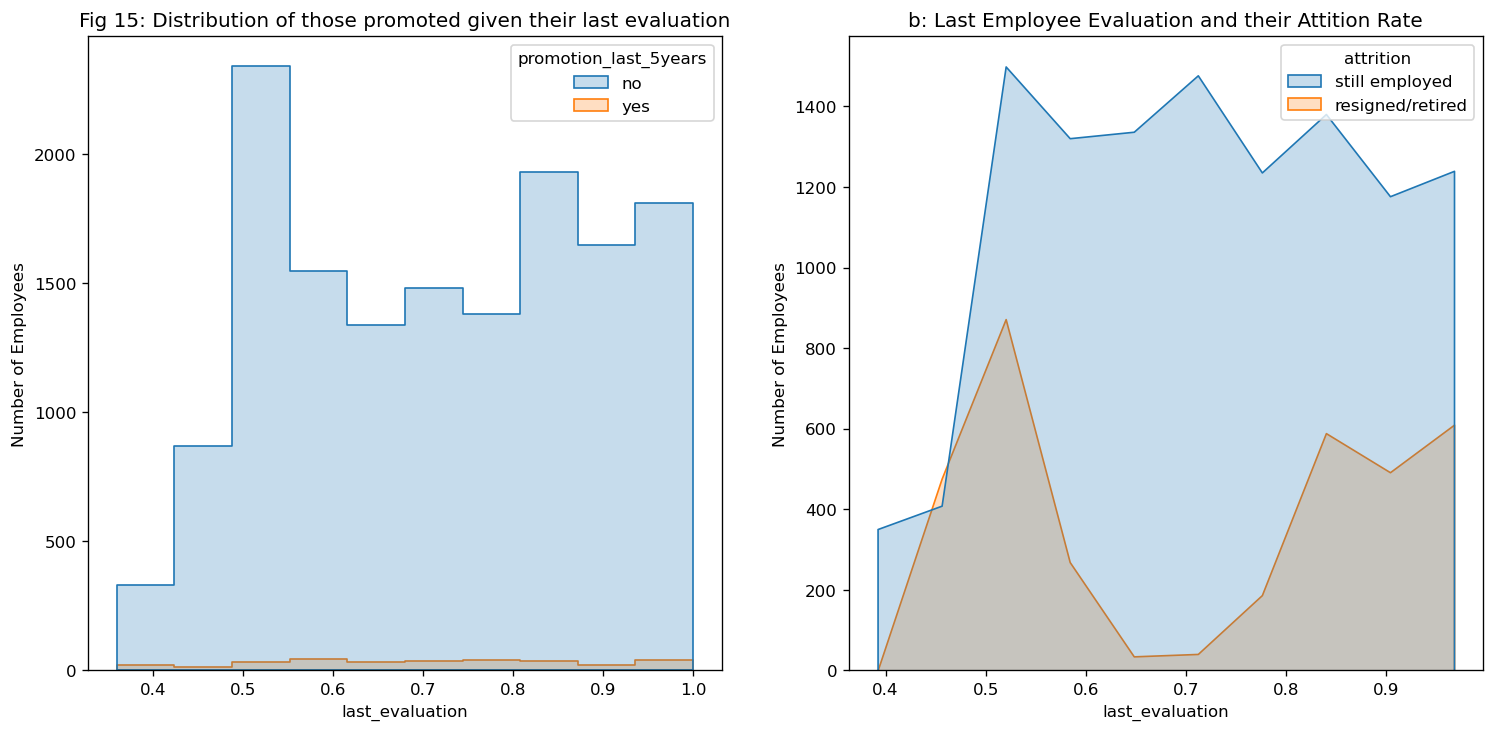

In [41]:
plt.figure(figsize=(15,7),dpi=120)
total = float(len(emp_data))
plt.subplot(1,2,1)
ax = sns.histplot(x='last_evaluation', hue='promotion_last_5years',data= emp_data, bins=10, element='step')
plt.title('Fig 15: Distribution of those promoted given their last evaluation')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.ylabel('Number of Employees')


total = float(len(emp_data))
plt.subplot(1,2,2)
ax = sns.histplot(x='last_evaluation',data= emp_data, hue='attrition',bins=10, element='poly')
plt.title('b: Last Employee Evaluation and their Attition Rate')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.ylabel('Number of Employees')
plt.show()

The distribution of workers who were promoted based on their last appraisal is shown in Fig. 15a above. The graph demonstrates a relatively weak relationship between the evaluation scores and the promotion rate. This is demonstrated by the fact that promotions were also given to individuals with evaluation rates between 0.0 and 0.5.
The overall number of promotions among employees in this range did not rise in proportion even in those who had extremely strong assessment results of 0.8 to 1.0.

On the other hand, Fig. 15b illustrates the rate of employee attrition based on the outcomes of their evaluations. A bigger percentage of people who left the company fall between the assessment scores of 0.0 and 0.65, with a score of 0.5 indicating the maximum attrition rate of the workforce. People who performed better on evaluations and had scores between 0.7 and 1.0 also experienced significant attrition rates, most likely because they weren't offered promotions despite satisfying the requirements.

Therefore, the company should establish clear promotion criteria if it intends to evaluate its workforce. It should use predetermined targets and additional metrics, such as sales volume, turnover volume, financial contribution, etc., to determine which employees should be promoted, even if they receive a high evaluation score. In this approach, if a worker falls short of those expectations, he or she won't be so unsatisfied as to quit the job and instead will work to get promoted at the next available opportunity.

## Number of Projects and Attrition rate

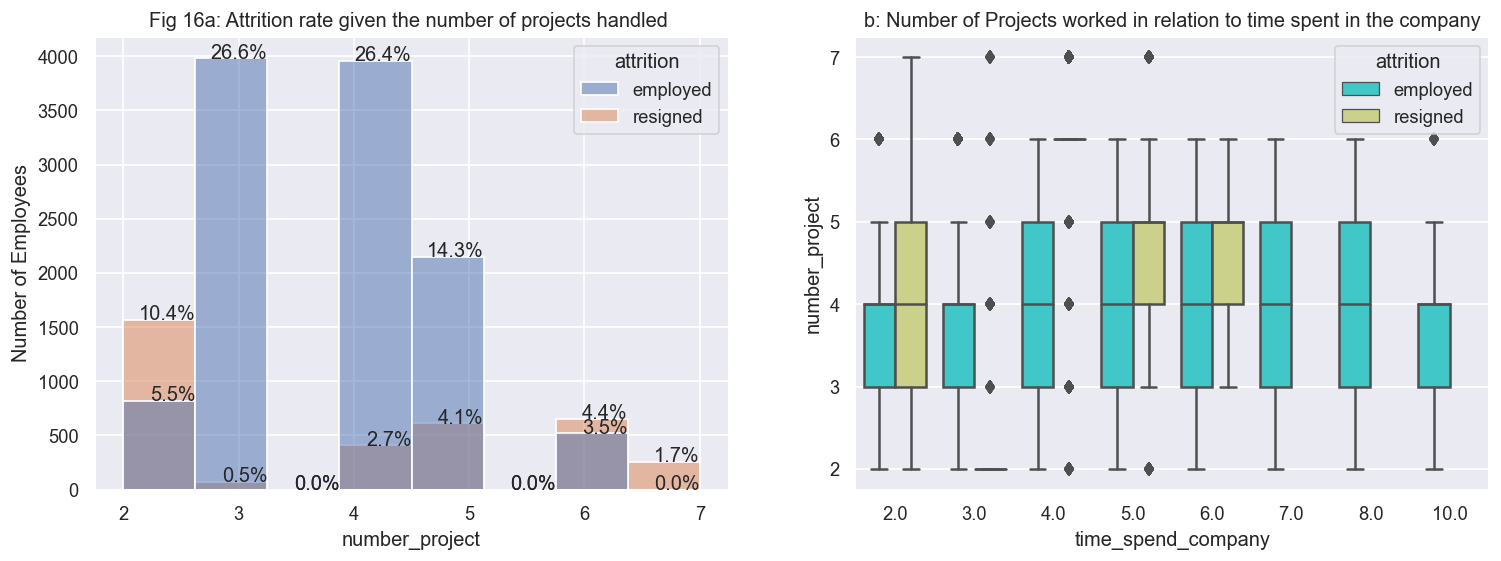

In [76]:
plt.figure(figsize=(15,5),dpi=120)
total = float(len(emp_data))
plt.subplot(1,2,1)
ax = sns.histplot(x='number_project',data= emp_data, hue='attrition',bins=8, multiple='layer')
plt.title('Fig 16a: Attrition rate given the number of projects handled ')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.ylabel('Number of Employees')
    
plt.subplot(1,2,2)
sns.boxplot(y='number_project', x='time_spend_company', data=emp_data, hue='attrition', palette='rainbow')
plt.title('b: Number of Projects worked in relation to time spent in the company')
plt.show()
    


The distribution of the employees' workload is depicted in Fig. 16a. The research indicates that, when compared to individuals who handled more projects, those who completed two projects had the greatest attrition rates (10.4% of the workforce). Employees with an average of three projects under their belts have the lowest attendance rates.

The attrition rate found in individuals who managed 7 projects stands out in this data, indicating that they were overworked. Fig. 16b is plotted to know the distribution of projects handled accoding to years spent in the company to determine whether the workers are overworked because it seems incorrect to simply use fig 16a to draw conclusions.

The average distribution of projects handled by employees looks evenly distributed at the 50th percentile across the years as shown in the box chat above (Fig. 16b) to be 4 projects. As a result, attrition rates are higher in years with more than 4 projects handled  especially in employees who have just been with the company for only 2 years, given that they have just been with the company for two years and are already managing as many as 5 - 7 projects, we could assume in year two that individuals who have left the company were overworked.

Going beyond year 4, it seems that the above reason for employee attrition as a result of projects handled in relation to time spent in  the company ceases to be relevant except we reverse the narative and assume that these employees left because they had handled fewer projects compared to those who have spent lesser years in the company.

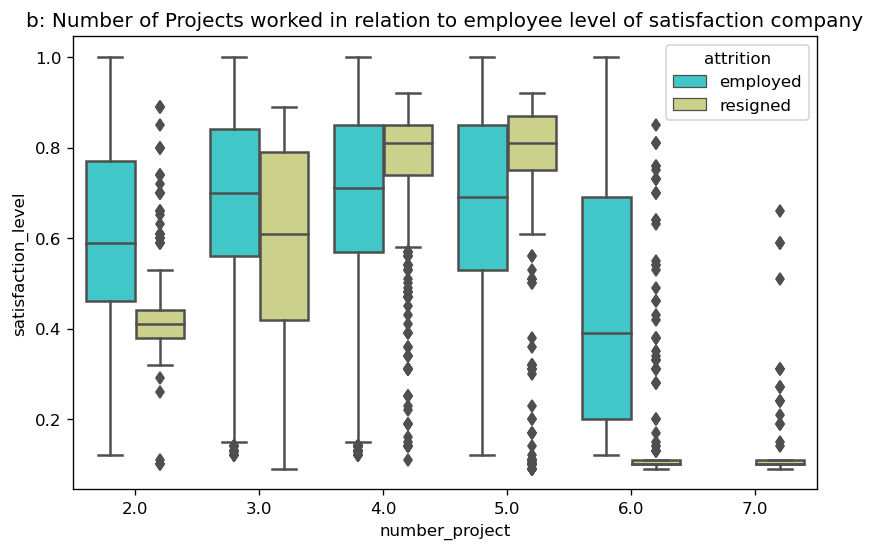

In [12]:
plt.figure(figsize=(8,5), dpi=120)
sns.boxplot(y='satisfaction_level', x='number_project', data=emp_data, hue='attrition', palette='rainbow')
plt.title('b: Number of Projects worked in relation to employee level of satisfaction company')
plt.show()


# Training a Predictive Model

In [7]:
#getting dummies for categorical datas
Attrition=pd.get_dummies(emp_data['attrition'],drop_first=True)
Salary=pd.get_dummies(emp_data['salary'],drop_first=True)
Dept=pd.get_dummies(emp_data['dept'],drop_first=True)
Promotion_last_5years=pd.get_dummies(emp_data['promotion_last_5years'],drop_first=True)

#Dropping already exixting columes to replace with dummies and Assigning the new data to variable name 'modeldata'
modeldata=emp_data.drop(['promotion_last_5years','salary','dept','attrition', 'index','avg_montly_hrs_bands'], axis=1)
modeldata

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident
0,2001.0,0.58,0.74,4.0,215.0,3.0,0.0
1,2002.0,0.82,0.67,2.0,202.0,3.0,0.0
2,2003.0,0.45,0.69,5.0,193.0,3.0,0.0
3,2004.0,0.78,0.82,5.0,247.0,3.0,0.0
4,2005.0,0.49,0.60,3.0,214.0,2.0,0.0
...,...,...,...,...,...,...,...
14994,14995.0,0.40,0.57,2.0,151.0,3.0,0.0
14995,14996.0,0.37,0.48,2.0,160.0,3.0,0.0
14996,14997.0,0.37,0.53,2.0,143.0,3.0,0.0
14997,14998.0,0.11,0.96,6.0,280.0,4.0,0.0


In [39]:
#concatenating dummies to modeldata
modeldata=pd.concat([modeldata,Attrition,Salary,Promotion_last_5years,Dept],axis=1)
modeldata

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,resigned,low,medium,...,yes,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,2001.0,0.58,0.74,4.0,215.0,3.0,0.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,2002.0,0.82,0.67,2.0,202.0,3.0,0.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,2003.0,0.45,0.69,5.0,193.0,3.0,0.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,2004.0,0.78,0.82,5.0,247.0,3.0,0.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2005.0,0.49,0.60,3.0,214.0,2.0,0.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14995.0,0.40,0.57,2.0,151.0,3.0,0.0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
14995,14996.0,0.37,0.48,2.0,160.0,3.0,0.0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
14996,14997.0,0.37,0.53,2.0,143.0,3.0,0.0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
14997,14998.0,0.11,0.96,6.0,280.0,4.0,0.0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [67]:
modeldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Emp ID                14999 non-null  float64
 1   satisfaction_level    14999 non-null  float64
 2   last_evaluation       14999 non-null  float64
 3   number_project        14999 non-null  float64
 4   average_montly_hours  14999 non-null  float64
 5   time_spend_company    14999 non-null  float64
 6   Work_accident         14999 non-null  float64
 7   resigned              14999 non-null  uint8  
 8   low                   14999 non-null  uint8  
 9   medium                14999 non-null  uint8  
 10  RandD                 14999 non-null  uint8  
 11  accounting            14999 non-null  uint8  
 12  hr                    14999 non-null  uint8  
 13  management            14999 non-null  uint8  
 14  marketing             14999 non-null  uint8  
 15  product_mng        

In [9]:
# Separate features and labels
X, y = modeldata[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','yes','low','medium','medium','RandD','accounting','hr','management','marketing','product_mng','sales','support','technical']].values, modeldata['resigned'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[  0.58   0.74   4.   215.     3.     0.     0.     1.     0.     0.
    0.     0.     0.     0.     0.     0.     1.     0.     0.  ]
 [  0.82   0.67   2.   202.     3.     0.     0.     1.     0.     0.
    0.     0.     0.     0.     0.     0.     1.     0.     0.  ]
 [  0.45   0.69   5.   193.     3.     0.     0.     1.     0.     0.
    0.     0.     0.     0.     0.     0.     1.     0.     0.  ]
 [  0.78   0.82   5.   247.     3.     0.     0.     1.     0.     0.
    0.     0.     0.     0.     0.     0.     1.     0.     0.  ]
 [  0.49   0.6    3.   214.     2.     0.     0.     1.     0.     0.
    0.     0.     0.     0.     0.     0.     1.     0.     0.  ]
 [  0.36   0.95   3.   206.     4.     0.     0.     1.     0.     0.
    0.     0.     0.     0.     0.     0.     1.     0.     0.  ]
 [  0.54   0.37   2.   176.     2.     0.     0.     1.     0.     0.
    0.     0.     0.     0.     0.     0.     1.     0.     0.  ]
 [  0.99   0.91   5.   136.     4.    

## Spliting Training data into 70%:30% for training and testing

In [10]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 10499 rows
Test Set: 4500 rows


## Regression Modelling using 'lbfgs'

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression

In [12]:
logmodel=LogisticRegression(solver='lbfgs', max_iter=1000)

#fit the log model into the X,Y train and test set
logmodel.fit(X_train,y_train)



LogisticRegression(max_iter=1000)

## Evaluate the model using the test data

In [13]:
# Evaluate the model using the test data
predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3407
           1       0.61      0.36      0.46      1093

    accuracy                           0.79      4500
   macro avg       0.72      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500



In [22]:
#Using confusion matrix to  evaluate the model preditive accuracy on the test data
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test,predictions)
cnf_matrix

array([[3164,  243],
       [ 687,  406]], dtype=int64)

Text(0.5, 1.0, 'Predicted')

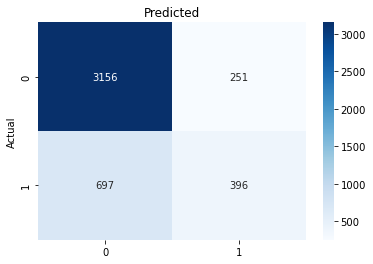

In [15]:
#plotting the cnf_matrix on a heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues', fmt='g')
plt.ylabel('Actual')
plt.title('Predicted')

## Overall Precison and Recall of the Regression model

In [20]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.6255778120184899
Overall Recall: 0.37145471180237877


The Predictive capability of this model is quite low at 61% and its overall recall is at 36%. Hence we will try another model to increase the predictive acuurary of the model.

## Trying another Regressor 'Liblinear'

In [16]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


In [17]:
#grouping predicted and actual labels
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [0 1 0 ... 1 0 0]
Actual labels:     [0 0 0 ... 1 0 0]


Accuracy:  0.7933333333333333
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3407
           1       0.63      0.37      0.47      1093

    accuracy                           0.79      4500
   macro avg       0.72      0.65      0.67      4500
weighted avg       0.77      0.79      0.77      4500

Overall Precision: 0.6255778120184899
Overall Recall: 0.37145471180237877
[[3164  243]
 [ 687  406]]


Text(0.5, 1.0, 'Predicted')

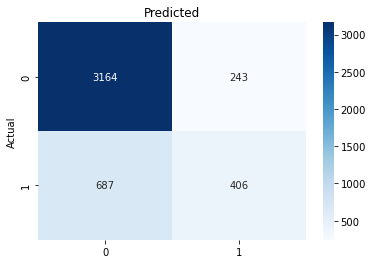

In [31]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

print(classification_report(y_test, predictions))

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm0 = confusion_matrix(y_test, predictions)
print (cm0)

sns.heatmap(pd.DataFrame(cm0), annot=True, cmap='Blues', fmt='g')
plt.ylabel('Actual')
plt.title('Predicted')


The overall precision and recal of this model is given above as 62.5% and 37% respectiveley, just slightly better than the previous model. so this is still not very optimal and we have to try another predictive model to further increase the prediction accuracy of our model.

**A common way to evaluate a classifier is to examine the true positive rate (which is another name for recall) and the false positive rate for a range of possible thresholds. We will plot these rates against all possible thresholds to form a chart known as a received operator characteristic (ROC) chart;**

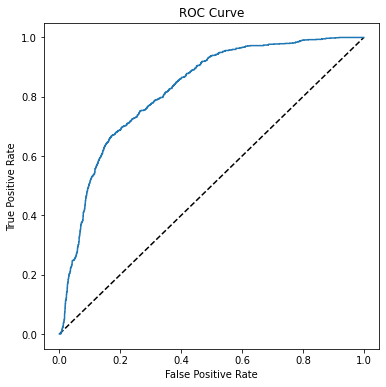

AUC: 0.8226212595509326


In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(X_test)# predicticting the probability of the label being true or false.


# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

plt.show()

## Perform Processes in a pipeline

In the case above, the ROC curve and its AUC indicate that the model performs better than a random guess which is not bad considering we performed very little preprocessing of the data.

We will perfrom some preprocessing of the data to make it easier for the algorithm to fit a model to it, but we'll limit ourselves to a few common processing techniques:
- Scaling numeric features so they're on the same scale. This prevents features with large values from producing coefficients that disproportionately affect the predictions.
- Encoding categorical variables, by using a one hot encoding technique you can create individual binary (true/false) features for each possible category value.

Confusion Matrix:
 [[3398    9]
 [  30 1063]] 

Accuracy: 0.9913333333333333
Overall Precision: 0.9916044776119403
Overall Recall: 0.9725526075022873

AUC: 0.9951457509980931


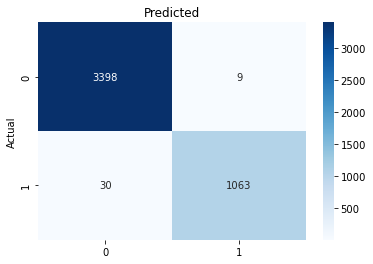

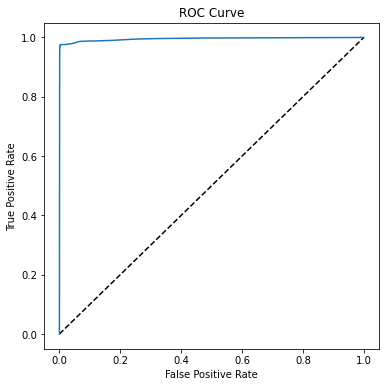

In [41]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_features = [7,8,9,10,11]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

from sklearn.ensemble import RandomForestClassifier

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))

y_scores = model.predict_proba(X_test)

predictions = model.predict(X_test)
cm1 = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm1, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

sns.heatmap(pd.DataFrame(cm1), annot=True, cmap='Blues', fmt='g')
plt.ylabel('Actual')
plt.title('Predicted')

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The above confusion matrix shows a prediction of 3401 employees that have resigned against the 3600 employees given on the main dataset.
This places our model on a 99% accuracy rate. The overall precision of the model is given to be 99.4% and a recall of 97.4%. With this, we could answer some imortant questions posed by the data and recommend further actions that could help in reducing attrition rate in his company.

From the above Confuson matrix,
* *True Positives*: This is given as 1065, representing emoplyees who are predicted to leave the company next.
* *False Positives*: This is given as 6 employees, representing employee who are predicted to leave the company but actually stayed.
* *False Negatives*: This is given as 28 employees, representing employees who actually resigned but turned out to still be employed.
* *True Negatives*: This is given as 3401, representing the actual and predicted employees who have resigned from thej company.

Thus the analysis above will be used to answer the following questions :

## **1. What type of employees are leaving?**:

From the data exploration, we could find out that certain factors have contributted to the attrition rate in the company and many employees could still be affected by these factors. These factors include but not limited to;

**i). Employees with Low to Medium Salary Levels:**

The disaparity in the salary levels of the employees company in relation with their levels of satisfaction shows that many employees are not satisfied with their salary level as shown in fig.7, and has prompted the resigation of some of the company's employees. There is a high concentration of employees on the medium and low salary level structure of the company. Other cross analysis shows that this salary factor also affected the employees satisfaction level as very few employees are on the high salary level, thus increasing the income gap within the company.

**ii). Employees having more Man hours Worked:**

The average industry man hours per week is given as 128-176 hrs per month in the USA. As shown in fig 10a and Fig 11b, we could deduce that the employees were mostly over worked especially looking at the Fig.11a data which showed that majority of those who have resigned worked higher than 200 hours per month and were not really satisfied. Fig 11b showed their monthly workinh hours against their time soent in the company, and we could deduce that those who have spent less than 3 and have worked more than 200 hours per month mostly resigned from being over worked. A further look into this showed that these employees were not being compensated for overtime worked and their salary levels is not commisorate with their level of work hour input (Fig 11a).

**iii). Low Promotion Rate within the last 5 years:**

According to the data in Fig 12, only about 2% of the entire workforce was promoted in the last 5 years. This is not a good policy being practiced by the company.  Promoting employee from lower level to the higher level brings about a feeling of satisfaction among the employees. It improves their job satisfaction and motivation by providing greater income, status and responsibilities. By building up loyalty, promotion reduces, labour turnover. To this effect, promotion should be done as frequent as 2- 3 years and clear promotional guidelines and KPI's be established and adhered to determine when employees have met the basic requirements to be promoted.

Additionally, Fig. 15 provides us with a highly insightful perspective on promotions. Only a small percentage of employees who received high assessment scores were promoted, similar to individuals who received low evaluation ratings. Many people who had very high scores were largely passed over for promotions, which may affect employee satisfaction and attrition.

**iv).Employees subjected to a subpar salary review policy.:**

Most employees who have remained with the company for up to three years and have not seen an increase in pay are likely to quit. As evidenced by the fig.8 above, employees who have gone more than three years without a salary increase from medium pay scale to high pay scale or from low  pay scale to medium pay scale also tend to resign.

**v). Attrition as a result of number of projects handled:**
When employees who are still new to the organization are overloaded with many projects to complete, they tend to burn out rapidly and are prone to quit. In Fig. 16, we can see that those who left their jobs were typically those who had managed more projects, especially for those who had only been working for less than three years. Those who had a better distribution of projects are happy and have stuck with the company.


## 2. Which employees are prone to leave next.
 
Given the aforementioned issues as potential causes of the high employee attrition rate in this corporation, it follows that these factors, if not addressed quickly, will increase employee turnover in the organization. However, there are some aspects that, if ignored, would unquestionably result in a high staff attrition rate. Consequently, among the workers who are likely to quit next are;
1. Workers who have worked for the company for a considerable amount of time yet are unhappy with their low- to medium-level pay levels.
2. Workers who have been stuck in the medium-to-low income range for more than three years without being promoted.
3. Employees who put in more than 200–250 hours a month without receiving adequate pay for overtime.
4. Workers whose overall score on the job satisfaction scale is less than 5.
5. Finaally, Employees who will reject every perk that the company offers them and yet quit. These workers, who are mainly content with their positions and earn high salaries, may choose to quit because other companies offer better possibilities, pay, or working circumstances.
 
## 3. Recommendations

**i). Constant Salary Review:**

The organization should have a better salary review policy that rewards employees with opportunities for improved pay as well as spelling out and disseminating to all parties involved, realistic guidelines and KPIs that inform their salary review decisions. In this approach, staff members won't be as irate if they don't get promoted because they didn't achieve predetermined guidelines and KPIs.

This suggestion holds true for internal employee promotions as well. Employees will work harder knowing that they will be rewarded if they reach particular company goals if there is an open and fair promotion procedure in place.

**ii). Overtime Compensation:** 

There should be established and followed overtime regulations. In order to achieve its cost-minimization goals and prevent taking on additional hours that they cannot afford to pay for, which will result in dissatisfied employees, a company would be wise to discourage its employees from working more than is necessary if its production or work model does not permit certain levels of paid overtime.

**iii). Improved promotion policies:**

How does employee performance impact promotion?
Employee satisfaction is increased when they are promoted from a lower level to a higher level. By giving them more money, status, and duties, it raises their level of job satisfaction and motivation. Promotion lowers labor turnover by increasing loyalty.

The business may decide to base staff promotions on indicators like sales volume and associated costs, as well as other performance indices. The organization should examine its promotion rate to roughly once every 2-3 years as many employees will not like to stay if they are not promoted in longer than 2-3 years, which is the suggested industry promotion practice.
